<a href="https://colab.research.google.com/github/Nburkhal/DS-Unit-4-Sprint-3-Deep-Learning/blob/master/LS_DS_Uni_4_Sprint_3_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Major Neural Network Architectures Challenge
## *Data Science Unit 4 Sprint 3 Challenge*

In this sprint challenge, you'll explore some of the cutting edge of Data Science. This week we studied several famous neural network architectures: 
recurrent neural networks (RNNs), long short-term memory (LSTMs), convolutional neural networks (CNNs), and Generative Adverserial Networks (GANs). In this sprint challenge, you will revisit these models. Remember, we are testing your knowledge of these architectures not your ability to fit a model with high accuracy. 

__*Caution:*__  these approaches can be pretty heavy computationally. All problems were designed so that you should be able to achieve results within at most 5-10 minutes of runtime on Colab or a comparable environment. If something is running longer, doublecheck your approach!

## Challenge Objectives
*You should be able to:*
* <a href="#p1">Part 1</a>: Train a RNN classification model
* <a href="#p2">Part 2</a>: Utilize a pre-trained CNN for objective detection
* <a href="#p3">Part 3</a>: Describe the components of an autoencoder
* <a href="#p4">Part 4</a>: Describe yourself as a Data Science and elucidate your vision of AI

<a id="p1"></a>
## Part 1 - RNNs

Use an RNN/LSTM to fit a multi-class classification model on reuters news articles to distinguish topics of articles. The data is already encoded properly for use in an RNN model. 

Your Tasks: 
- Use Keras to fit a predictive model, classifying news articles into topics. 
- Report your overall score and accuracy

For reference, the [Keras IMDB sentiment classification example](https://github.com/keras-team/keras/blob/master/examples/imdb_lstm.py) will be useful, as well the RNN code we used in class.

__*Note:*__  Focus on getting a running model, not on maxing accuracy with extreme data size or epoch numbers. Only revisit and push accuracy if you get everything else done!

In [1]:
from tensorflow.keras.datasets import reuters

(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=None,
                                                         skip_top=0,
                                                         maxlen=None,
                                                         test_split=0.2,
                                                         seed=723812,
                                                         start_char=1,
                                                         oov_char=2,
                                                         index_from=3)

2113536/2110848 [==============================] - 0s 0us/step


In [7]:
# How many classes do we have?
import numpy as np
np.unique(y_train).shape, np.unique(y_test).shape

((46,), (46,))

In [8]:
# Demo of encoding

word_index = reuters.get_word_index(path="reuters_word_index.json")

print(f"Iran is encoded as {word_index['iran']} in the data")
print(f"London is encoded as {word_index['london']} in the data")
print("Words are encoded as numbers in our dataset.")

Iran is encoded as 779 in the data
London is encoded as 544 in the data
Words are encoded as numbers in our dataset.


In [9]:
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM

batch_size = 46
max_features = len(word_index.values())
maxlen = 200

print(len(X_train), 'train sequences')
print(len(X_test), 'test sequences')

print('Pad sequences (samples x time)')
X_train = sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = sequence.pad_sequences(X_test, maxlen=maxlen)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)


print('Build model...')
# TODO - your code!
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(46, activation='softmax'))

8982 train sequences
2246 test sequences
Pad sequences (samples x time)
X_train shape: (8982, 200)
X_test shape: (2246, 200)
Build model...


In [10]:
# You should only run this cell once your model has been properly configured

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=1,
          validation_data=(X_test, y_test))
score, acc = model.evaluate(X_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Train...
Train on 8982 samples, validate on 2246 samples
2246/2246 [==============================] - 5s 2ms/sample - loss: 1.8874 - acc: 0.4679
Test score: 1.8874144693197996
Test accuracy: 0.467943


## Sequence Data Question
#### *Describe the `pad_sequences` method used on the training dataset. What does it do? Why do you need it?*

Neural networks expect fixed size inputs, so by padding the sequences/sentences we can ensure that the network gets sentences of the same length every time.

## RNNs versus LSTMs
#### *What are the primary motivations behind using Long-ShortTerm Memory Cell unit over traditional Recurrent Neural Networks?*

LSTM has better long term dependencies compared to a simple RNN. It achieves that by adding a remember/forget gate inside a single cell. This gate helps alleviate the vanishing gradient problem by smoothing the loss function out (in a sense) over a long time horizon.

## RNN / LSTM Use Cases
#### *Name and Describe 3 Use Cases of LSTMs or RNNs and why they are suited to that use case*

Time dependent dataset can be modeled using LSTM/RNN. For example: 1) using weather data to predict tomorrow's temperature; 2) using financial/economic data to predict tomorrow's stock price; 3) using a large linguistic corpus 
to predict the next word/character in a sequence.

<a id="p2"></a>
## Part 2- CNNs

### Find the Frog

Time to play "find the frog!" Use Keras and ResNet50 (pre-trained) to detect which of the following images contain frogs:

<img align="left" src="https://d3i6fh83elv35t.cloudfront.net/newshour/app/uploads/2017/03/GettyImages-654745934-1024x687.jpg" width=400>


In [0]:
!pip install google_images_download

     |████████████████████████████████| 911kB 4.0MB/s 
  Created wheel for google-images-download: filename=google_images_download-2.8.0-py2.py3-none-any.whl size=14550 sha256=de5fe354305209a28b3190d17f065ced16414b05aa03a4ade370485b52f7d0c6
  Stored in directory: /root/.cache/pip/wheels/1f/28/ad/f56e7061e1d2a9a1affe2f9c649c2570cb9198dd24ede0bbab
Successfully built google-images-download


In [0]:
from google_images_download import google_images_download

response = google_images_download.googleimagesdownload()
arguments = {"keywords": "animal pond", "limit": 4, "print_urls": True}
absolute_image_paths = response.download(arguments)


Item no.: 1 --> Item name = animal pond
Evaluating...
Starting Download...
Image URL: https://pklifescience.com/staticfiles/articles/images/PKLS4116_inline.png
Completed Image ====> 1.PKLS4116_inline.png
Image URL: https://i.ytimg.com/vi/NCbu0TND9vE/hqdefault.jpg
Completed Image ====> 2.hqdefault.jpg
Image URL: https://pklifescience.com/staticfiles/articles/images/PKLS4116.png
Completed Image ====> 3.PKLS4116.png
Image URL: https://i.pinimg.com/originals/12/ae/e2/12aee2aa186a7b69a66563f138bba822.jpg
Completed Image ====> 4.12aee2aa186a7b69a66563f138bba822.jpg

Errors: 0



At time of writing at least a few do, but since the Internet changes - it is possible your 5 won't. You can easily verify yourself, and (once you have working code) increase the number of images you pull to be more sure of getting a frog. Your goal is to validly run ResNet50 on the input images - don't worry about tuning or improving the model.

*Hint* - ResNet 50 doesn't just return "frog". The three labels it has for frogs are: `bullfrog, tree frog, tailed frog`

*Stretch goal* - also check for fish.

In [0]:
# You've got something to do in this cell. ;)

import numpy as np

from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

def process_img_path(img_path):
  return image.load_img(img_path, target_size=(224, 224))

def img_contains_frog(img):
    """ Scans image for Frogs
    
    Should return a integer with the number of frogs detected in an
    image.
    
    Inputs:
    ---------
    img:  Precrossed image ready for prediction. The `process_img_path`             function should already be applied to the image. 
    
    Returns: 
    ---------
    frogs (boolean):  TRUE or FALSE - There are frogs in the image.
    
    """
    # Your Code Here
    # TODO - your code!
    resnet = ResNet50(include_top=True, weights='imagenet')
    pred = resnet.predict(img)
    
    # looking at the top 5 detected classes only
    result = decode_predictions(pred, top=5)[0]
    
    # flatten the list of tuples and turn everything into a string
    frog_count = list(sum(result, ()))
    frog_count = [str(i) for i in frog_count]
    
    # count the number of times 'frog' appear in the result string
    final_frog_count = (' '.join(frog_count)).count('frog')
            
    return final_frog_count

#### Displaying Predictions
The next two cells are just to display some of your predictions. You will not be graded on their output. 

In [0]:
import matplotlib.pyplot as plt

def display_predictions(urls):
    image_data = []
    frogs = []
    for url in urls:
        x = process_img_path(url)
        x = image.img_to_array(x)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)
        image_data.append(x)
        frogs.append(img_contains_frog(x))
    
    return image_data,frogs

40960/35363 [==================================] - 0s 0us/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


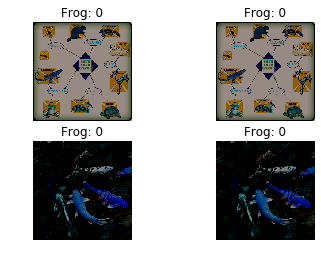

In [0]:
f, axarr = plt.subplots(2,2)

imgs, frogs = display_predictions(absolute_image_paths[0]['animal pond'])

for x,y in [(0,0),(0,1), (1,0), (1,1)]:  
    axarr[x,y].imshow(np.squeeze(imgs[x], axis=0) / 255)
    axarr[x,y].set_title(f"Frog: {frogs[x]}")
    axarr[x,y].axis('off')

<a id="p3"></a>
## Part 3 - Autoencoders

Describe a use case for an autoencoder given that an autoencoder tries to predict its own input. 

__*Your Answer:*__ A really prime example of an autoencoder would be image detection. Since autoencoders learn to ignore noise in data, an image recognition example would learn the bare minimum of what it needs to accurately detect an image. More clearly, take a super hi-res picture of a turtle. An autoencoder would essentially reduce the dimensionality of the data (make the image more pixelated), but only to the point where it can still recognize the image. SO our super hi-res image of the turtle would go into the auto encoder, and come out looking more like a pixelated picture from those old Ninja Turtles games on SNES.

<a id="p4"></a>
## Part 4 - More...

Answer the following questions, with a target audience of a fellow Data Scientist:

- What do you consider your strongest area, as a Data Scientist?
  - My ability to learn quickly. There's no way to know everything, but being able to look things up and understand them is a valuable skill. Also, I consider my drive to _be_ a data scientist my strongest area. It's the underlying motivation for my ability to learn things quickly.
- What area of Data Science would you most like to learn more about, and why?
  - Good question. My curiosity draws me toward the research aspects of the field, but I also have a disdain for academia and want to put my skills to more applicable uses (maybe satiate my curiosity in the garage after work or something). Logistics has always interested me, and that's where I'd ultimately like to focus my energies. Amazon's donig some mindblowing stuff and FedEx has positioned themselves as major competitors. Logistics will only get more interesting in the coming years. Also, if we get hit with an EMP, or the robots take over, logistics will still be a valuable field of study. So long as there are people, there will be needs to fill, which requires logistics.
- Where do you think Data Science will be in 5 years?
  - Conversations will start being had among lawmakers similar to those they had in the early 2000s regarding accounting and GAAP. It's going to take an egregious act by some major company (doesn't have to be American, just has to scare the crap out of the American public - my money's on a Chinese company), but I believe that data scientists will soon need specific certifications, much like CPAs or lawyers, in order to practice. There will also be a set of geenerally accepted data principles that everyone must follow. I also believe that people will have to obtain certain levels of ecurity clearance to use certain types of neural networks as governments race to obtain better technologies and more data.
- What are the threats posed by AI to our society?
  - AI will be this generation's cold war nuclear arms race. The biggest threat is AI's ability to make us indifferent to war.
- How do you think we can counteract those threats? 
  - Aside from cultural and/or spiritual revolution? Nothing can stop it. This won't be solved sitting in front of a computer screen.
- Do you think achieving General Artifical Intelligence is ever possible?
  - Humans will manage to destroy themselves with sub-human level algorithms long before AGI is achieved, so no.

A few sentences per answer is fine - only elaborate if time allows.

## Congratulations! 

Thank you for your hard work, and congratulations! You've learned a lot, and you should proudly call yourself a Data Scientist.


In [0]:
from IPython.display import HTML

HTML("""<iframe src="https://giphy.com/embed/26xivLqkv86uJzqWk" width="480" height="270" frameBorder="0" class="giphy-embed" allowFullScreen></iframe><p><a href="https://giphy.com/gifs/mumm-champagne-saber-26xivLqkv86uJzqWk">via GIPHY</a></p>""")